# Windpower

**Fundamentals of Data Analysis Project 2020**

*Development of linear regression model for the wind turbine [powerproduction dataset](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/powerproduction.csv) in order to accurately predict the power output of a windturbine for a given wind speed.*  
***

## 1.0 Background

Wind energy has been used by humans for thousands of years, from the earliest of sailers using wind to propel their boats to ancient farmers using early windmills to grind grain for food production. 

Today in Ireland with the climate emergency & the need for the reduction of dependance on fossil fuels, wind energy development has become an essential means for producing clean renewable electricity, with "wind providing 85% of Ireland’s renewable electricity and 30% of our total electricity demand". [1]

Wind power describes the process in which wind is used to generate mechanical power or electricity.

A wind turbine turns wind energy into electricity using the aerodynamic force from the rotor blades, when wind flows towards a turbine the aerodynamic properties of the rotor blades cause a pressure difference across the two sides of the blade exerting both a lift and drag force on the rotor, similar to how a aeroplane wing works. 
The rotor blade is designed so the lift force experienced is stronger than the drag which will cause the rotor to spin, the spinning rotor of the turbine is then used to drive a genertor for the creation of electricity. 

![Rotor Blade](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Rotor%20Blade.png?raw=true)

**Figure 1** - Rotor Blade Aerodynamic Properties - [alternative-energy-tutorials.com](http://www.alternative-energy-tutorials.com/energy-articles/wind-turbine-blade-design.html)
***

### 1.1 Wind Power

Wind turbines work by converting kinetic energy of the wind first into the kinetic energy of the rotation of the turbine rotor blades and then into electrical energy through the turbine generator. 

Derived from Newton's laws of motion the theoretical power converted from the wind into rotational energy in the wind turbine is calculated using the formula [2];

$$ P= \frac{1}{2}\rho A v^3 C_p \hspace{1cm} (1) $$ 

$ P $ = Power $(W)$ 

$ \rho $ = Air Density $(kg/m^3)$

$ A = $ Swept Area $(m^2)$ of the turbine 

$ v = $ Wind Speed $(m/s)$

$ C_p $ = Power Coefficient 

**Note:** The German physicist Albert Betz concluded in 1919 that the theoretical maximum efficiency for any design of wind turbine is 59.3% also known as the Betz limit[2]

In reality, turbines cannot reach the Betz limit, and common efficiencies are in the 35-45% range ($C_p$ = 0.35 - 0.45) [2]

The $C_p$ value is unique to each turbine type, is a function of wind speed and is influenced by various turbine engineering requirements such as strength, durability along with other turbine ineffiencies such as the generator & power transmission. Therefore the amount of wind power converted into actual usable electricity can be as low as 10 - 30% [2].
***

### 1.2 Power Curves of Wind Turbines

Power curves of a wind turbines depicts the relationship between wind speed & output power and are used for predicting wind turbines energy output & performace for a given wind forecast. 

Power curves are developed using data from manufacturers’ specifications and actual data collected from the wind farms.

![Wind Power Curve](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Typical%20Power%20Curve.png?raw=true)

**Figure 2** - Typical Wind Power Curve - [www.hindawi.com](https://www.hindawi.com/journals/jen/2016/8519785/)

**Region 1** - Wind speed is not sufficiently high to produce enough force inorder to rotate the turbine rotor blades, therefore the power output of the turbine is zero.

*$ v_{cut-in} $* The wind speed which results in rotation of the rotor blades & begins to drive turbine generator (typically 2-5m/s). The wind turbine may generate some power output at $ v_{cut-in} $ however it
may not be enough to overcome any generator or turbine ineffiencies & therefore no electricity may be produced at this wind speed. 

**Region 2** - The range of wind speed for which the turbine operates & produces electrical power output, note that there is a rapid growth of power produced over this range of wind speeds.

$ v_{rated} $ The optimal operational wind speed for a given wind turbine, note this wind speed may not equate to the max achievable power output but rather the most efficient attainable power output (Rated Power Output) for the wind turbine.

**Region 3** - The constant Rated Power Output is maintained in this wind speed region up untill cut-out wind $ v_{cut-off} $ is reached.

$ v_{cut-off} $ The wind speed at which the turbine is taken out of operation to protect its components from high winds (typically 20–30 m/s).

**Region 4** - Also know furling, for wind speeds at or greater than $ v_{cut-off} $, the turbine is taken out of operation to protect its components from high winds, the turbine produces no power output within this region.

| SMALL TURBINES (0-10m DIAMETER ROTORS) | LARGE TURBINE (160 - 200m DIAMETER ROTORS) | 
|---|---|
| <img src="https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Smallest%20Turbines%20-%20Power%20Curve.png?raw=true" width="490"/> | <img src="https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Largest%20Windturbine%20-%20Power%20Curve.png?raw=true" width="490"/> |

**Figure 3** - Wind Power Curves For Various Turbine Types - [wind-turbine-models.com](https://en.wind-turbine-models.com/powercurves)

From the 2 examples of wind turbine power curves above, it can be seen that the smaller turbines with rotor diameters between 0-10m can have a power output up to 20kW for wind speeds up to 12m/s.

While the largest turbines with rotor diameters between 160 - 200m can produce up to 8000kW for wind speeds up to 12m/s.

***

## 2.0 Powerproduction Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# set plot style
plt.style.use("ggplot")

# Increase the size of the output plots
plt.rcParams["figure.figsize"] = (10,7)

In [3]:
# load powerproduction.csv file into pandas dataframe
df_wind = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

# Output descriptive statistics of df_wind
df_wind.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The pandas **DataFrame.describe()** function provides a very useful summary of the *powerproduction dataset*.

It can be seen that the dataset consists of 2 columns, speed (wind speed) & power, each column contains 500 datapoints. 

No infomation has been provided regarding the size or type of the turbine from which the data has been collected. 
No information has been provided regarding the units of measurement used for the data contained within the dataset.

However by looking at the values within the *powerproduction dataset* and comparing it to the wind turbine power curves found on [wind-turbine-models.com](https://en.wind-turbine-models.com/powercurves) the following can be assumped:

- speed (wind speed) - metres per second, $m/s$
- power - kilowatts, $kW$

The summary of the *powerproduction dataset* indicates that the unknown turbine from which the dataset was compiled, has achieved a max powerout of 113kW, this might indicate that the turbine has a rated power output around 100kW. 

From further review of the various wind turbine data & power curves found on [wind-turbine-models.com](https://en.wind-turbine-models.com/powercurves) it would appear that the *powerproduction dataset* within this project is comparable to that of a wind turbine with a rotor diameter in the range of 20 to 30m.

**Power Curve - Speed vs Power**

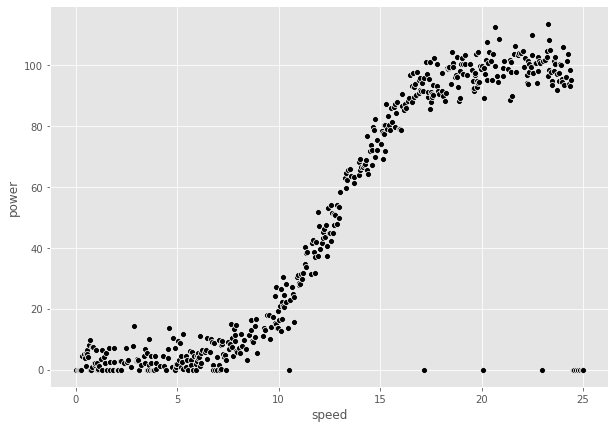

In [4]:
# Seaborn scatterplot of wind speed vs power from df_wind

sns.scatterplot(data=df_wind, x="speed", y="power", color='k')
plt.show()

The seaborn scatterplot of 'power' vs 'speed' for the *powerproduction dataset* reflects the very distincive powercurve shape of that of a typical wind turbine, refering back to **figure 2** the different regions of the wind turbine powercurve can be clearly differentiated.

The plot also highlights a number of possible outliers or datapoints that don't appear to fit within the dataset.

There are a number of points where the wind speed has increased above 10m/s but the power output for these points has remained at 0, it is a possibility that for these points the wind speed was recorded at a time when the wind turbine was not operable and therefore no corresponding power output was recorded. 
These points will be removed from the dataset, to prevent any possible obscurring of the analysis or results.

There also appears to be a number of possible outliers within the windspeed range from 0 to 5m/s, theoretically the powercurve should reflect that of region 1 as shown in **Figure 2** above i.e zero power should be produced prior to the *$ v_{cut-in} $* wind speed. However the practical operation of a wind turbine will not always reflect the idealistic theoretical models, as seen in the plot above a number of the datapoints are well above 0kW & achieve as high as ~15kW within this region. The are many possible factors that result in the turbine producing a power output for these low wind speeds and therefore for the purpose of this project and without having further information regarding the behaviour of the wind turbine I will leave the datapoints within this region as is and not provide any further cleaning of the dataset.  

A similar approach will be taken to any of the possible outliers within the windspeed range from 20 to 25m/s, i.e region 3 as shown in **Figure 2**.

**Cleaning the Dataset**

In [5]:
# Selecting all the outlier datapoints where wind speed > 0 & powerout = 0
df_out = df_wind[(df_wind["speed"]>10) & (df_wind["power"]==0)]

print(df_out)
df_out.count()

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    14
power    14
dtype: int64

There are 14 number outliers to be removed from the *powerproduction dataset*

In [6]:
# remove the outliers to clean up the dataset
df_clean = df_wind.drop(df_out.index, axis=0)

print(df_clean.describe())

# Output cleaned dataset as a csv file
df_clean.to_csv("powerproduction_clean.csv", index=False, encoding='utf8')

            speed       power
count  486.000000  486.000000
mean    12.298311   49.397720
std      7.084043   41.391996
min      0.000000    0.000000
25%      6.137250    5.868250
50%     12.349500   44.773000
75%     18.386750   93.751250
max     24.399000  113.556000


By removing the outliers, it can be seen that the average speed & max speed of the dataset have been slightly reduced. 

The cleaned up dataset has also been output as "powerproduction_clean.csv" file.

***

## 3.0 Wind Power Mathematical Models

A look at some of wind power mathematical formulas & models with a review & comparison against the *powerproduction dataset* values.

### 3.1 Theoretical Wind Power Formula

$$ P= \frac{1}{2}\rho A v^3 C_p \hspace{1cm} (1)$$

![swept area](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Wind%20Turbine%20Swept%20Area.PNG?raw=true)

**Figure 4** - Wind Turbine Swept Area - [renewable-solar-energy.blogspot.com](http://renewable-solar-energy.blogspot.com/2011/07/wind-turbine-swept-area.html)

In [7]:
# Using Formula (1) to calculate the Theoretical Wind Power

def P1(v, r, cp):
    '''Function to calculate Wind Power
    Input variables: - 
    v = wind speed
    r = wind turbine rotor radius,
    cp = power coefficent''' 

    # Air Density taken as 1.23 kg/m3
    rho = 1.23
    
    # Swept area of turbine πr^2
    A = (r**2) * 3.14
    
    # Power formula (1)
    Power = 0.5*rho*A*(v**3)*cp / 1000
    
    return Power

In [8]:
# create a NumPy array to provide wind speeds from 0 upto 17.5m/s in 0.5m/s increments
v = np.linspace(0.0, 17.5, 35)

Create a number of Theoretical Wind Power models by varying the power coefficent 'cp' & turbine rotor radius 'r'.

|Turbine|Rotor Diameter 'D' (m)|Rotor Radius 'r' (m)|Power Coefficent 'cp'|
|---|---|---|---|
|Turbine 1|20|10|0.3|
|Turbine 2|15|7.5|0.3|
|Turbine 3|10|5|0.3|
|Turbine 4|20|10|0.2|
|Turbine 5|15|7.5|0.2|
|Turbine 6|10|5|0.2|

In [9]:
# DataFrame with power outputs for turbines with different parameters as listed above 

df_models = pd.DataFrame({"wind speed": v, 
                           "Turbine 1":P1(v, 10, 0.3), 
                           "Turbine 2":P1(v, 7.5, 0.3), 
                           "Turbine 3":P1(v, 5, 0.3),
                           "Turbine 4":P1(v, 10, 0.2),
                           "Turbine 5":P1(v, 7.5, 0.2), 
                           "Turbine 6":P1(v, 5, 0.2),
                         })

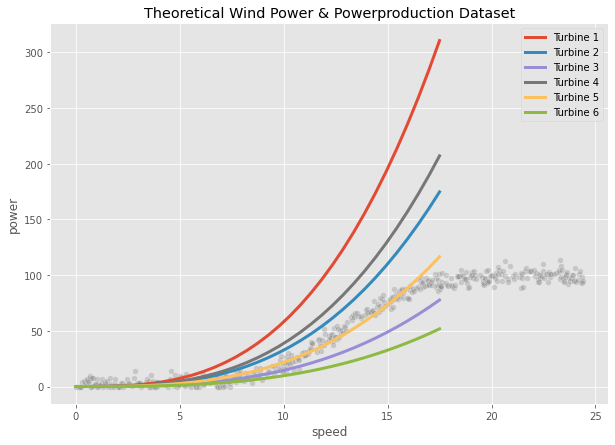

In [10]:
# Comparing the above model plots against the powerproduction dataset 

sns.lineplot(x=df_models["wind speed"], y=df_models["Turbine 1"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["Turbine 2"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["Turbine 3"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["Turbine 4"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["Turbine 5"], linewidth = 3)
sns.lineplot(x=df_models["wind speed"], y=df_models["Turbine 6"], linewidth = 3)

# apply legend to plot
plt.legend(labels=['Turbine 1', 'Turbine 2', 'Turbine 3', 'Turbine 4', 
                   'Turbine 5', 'Turbine 6' 
                  ])
# apply title to plot
plt.title("Theoretical Wind Power & Powerproduction Dataset")

sns.scatterplot(data=df_clean, x="speed", y="power", color='grey', alpha=0.3)
plt.show()

Overlaying the theoretical wind power outputs for different turbine parameters against the *powerproduction dataset* provides some interesting insights into & highlights some differences between the theoretical wind power formula & the *powerproduction dataset*.    

1. Reducing the turbine rotor diameter by 5.0m, i.e 20m down to 15m down to 10m can result in approximately halfing the theorectical wind power output each time for the given wind speeds.


2. By comparing the different theoretical wind turbine power outputs against the *powerproduction dataset*, it would appear that the theoretical turbine model 5 is the closest approx fit to the dataset. That is a turbine with a diameter of 15m & a power coefficient = 0.2. There are however so many variables that influence a turbines power output & wind power curve, that it would not be possible to say for definite that the powerproduction dataset was in fact produced by a 15m diameter turbine.


3. Note that the formula for calculating the theoretical wind power output does not incorporate any of the operational practicalities of a wind turbine, i.e there is no means to account for the cut-off wind velocity or the operational safety of the turbine instead the formula indicates an exponential growth of wind power output, which is not the case as previously noted in the **Power Curves of Wind Turbines** section above. 

### 3.2 4-Parameter Logistic Function Model

The 4 parameter logistic function provides a continuous curve relationship between wind speed and generated power [4].

$$ P(u) = a \frac{1 + me^{-u/t}}{1+ ne^{-u/t}} \hspace{1cm} (2)$$

(i) $a = P_r$

(ii) $n = e^{2su_{ip} / (P_r - P_{ip})}$

(iii) $m = (\frac{2P_{ip}}{P_r} - 1) n$

(iv) $\tau = \frac{P_r-P_{ip}}{2s}$

$P_r$, $s$, $u_{ip}$, $P_{ip}$ can be obtained directly from the power curve.

$P_r$ - Rated turbine power output, given by the turbine manufacturer.

($u_{ip}$, $P_{ip}$) - Coordinates of the inflection point, i.e where the gradient of power reaches its maximum.

$s$ -  Slope of the curve

**Calculating Parameters of 4-P Logistic Function**
![4-P Powercurve](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/4-P%20Powercurve.png?raw=true)

The input parameter values for the 4-parameter logistic function were approximated by reading & estimating the values directly from the powercurve of the *powerproduction dataset*.

Power Rating, $P_r$ = 100kW

Slope, $s$ = 12

Point of Inflection, $u_{ip}$, $P_{ip}$ = (12.5m/s, 50kW)

In [11]:
# Calculating parameters based on powerproduction dataset power curve [4]

# INPUT PARAMETERS:

p_r = 100                         # Turbine rated power, estimate from power curve plot

                                  # Calculating slope of line 
y_2 = 80                          # Coordinate values read from power curve plot                         
x_2 = 15
y_1 = 20
x_1 = 10
slope = (y_2 - y_1) / (x_2 - x_1)     
print("slope s =", slope)

s = slope  
                                  # Coordinate values read from power curve plot
u_ip = 12.5                       # Wind Speed at curve inflection point
p_ip = 50                         # Power at curve inflection point

a = p_r
print("a = ", a)

n = np.exp((2*s*u_ip)/(p_r-p_ip))
print("n = ", n)

m = (((2*p_ip)/p_r)-1)*n
print("m =", m)

tau = ((p_r-p_ip)/(2*s))
print("tau =", tau)

slope s = 12.0
a =  100
n =  403.4287934927351
m = 0.0
tau = 2.0833333333333335


In [12]:
# Using 4-parameter logistic function (2) to develop wind power curve
def P2(u):
    '''4-parameter logistic function,
    Input parameters: - 
    a, m, n & tau'''
    # a, m, n, tau = 100, 0, 600, 2 # Initial Estimate test values (uncomment to use as inputs)
    P = a * (1.0 + m * np.exp(-u / tau)) / (1.0 + n * np.exp(-u / tau))
    return P

In [13]:
# DataFrame with Wind speed & Power calculated using 4-parameter logistic function
df_4p_model = pd.DataFrame({"Wind Speed":df_clean["speed"], "Power Predict":P2(df_clean["speed"])})

# Output Summaries of "4P-Logistic Function - Power Output" & "Powerproduction Dataset - Power Output"
print("4P-Logistic Function - Power Output", "\n", df_4p_model["Power Predict"].describe(), "\n")

print("Powerproduction Dataset - Power Output", "\n", df_clean["power"].describe())

4P-Logistic Function - Power Output 
 count    486.000000
mean      49.346210
std       40.784914
min        0.247262
25%        4.504046
50%       48.194801
75%       94.404510
max       99.670326
Name: Power Predict, dtype: float64 

Powerproduction Dataset - Power Output 
 count    486.000000
mean      49.397720
std       41.391996
min        0.000000
25%        5.868250
50%       44.773000
75%       93.751250
max      113.556000
Name: power, dtype: float64


In [14]:
# Calculate the power difference
diff_4p = df_4p_model["Power Predict"] - df_clean["power"]

# compile Actual Power & Predicted Power into a pandas dataframe
df_4p_model["Power Actual"] = df_clean["power"]
df_4p_model["Difference"] = diff_4p
df_4p_model= df_4p_model.set_index('Wind Speed')

df_4p_model

,Power Predict,Power Actual,Difference
Wind Speed,,,
0.000,0.247262,0.000,0.247262
0.125,0.262512,0.000,0.262512
0.150,0.265673,0.000,0.265673
0.225,0.275384,0.000,0.275384
0.275,0.282055,0.000,0.282055
...,...,...,...
24.249,99.645802,103.700,-4.054198
24.299,99.654172,93.694,5.960172
24.349,99.662345,93.078,6.584345


#### R-Squared (coefficient of determination) Values 

In [53]:
# R-Squared value for 4-P Logistic Function
r_sq_4p = metrics.r2_score(df_4p_model["Power Actual"], df_4p_model["Power Predict"])

print("Coefficient of Determination R^2 = ", r_sq_4p)

Coefficient of Determination R^2 =  0.988132243924935


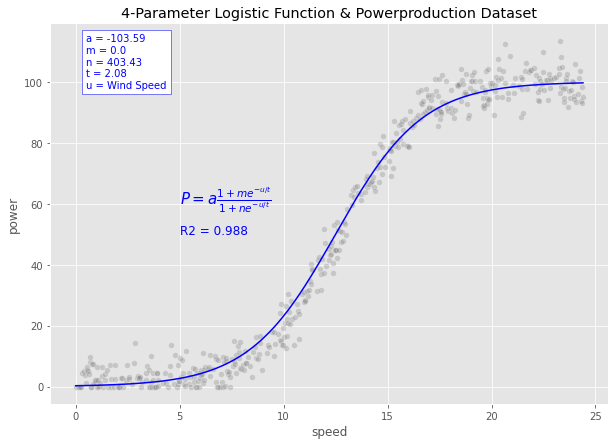

In [98]:
# Plot of 4-P Logistic Function
sns.lineplot(x=df_4p_model.index, y=df_4p_model["Power Predict"], color='b')

# apply title to plot
plt.title("4-Parameter Logistic Function & Powerproduction Dataset")

# apply function formula text to plot
plt.text(5, 60, 
         r'$ P = a \frac{1 + me^{-u/t}}{1+ ne^{-u/t}} $', 
         size=15, color='b'
        )

# Include function variable values in plot
txt = '\n'.join((
        "a = {}".format(round(a, 2)),
        "m = {}".format(round(m, 2)),
        "n = {}".format(round(n, 2)),
        "t = {}".format(round(tau, 2)),
        "u = Wind Speed" ))

plt.text(0.5, 98, txt, bbox=dict(facecolor='w', edgecolor='b'), color='b')

# Include R-Squared value in plot
plt.text(5, 50, "R2 = {}".format(round(r_sq_4p, 3)), color='b', size=12)

# Powerproduction Dataset Plot
sns.scatterplot(data=df_clean, x="speed", y="power", color='grey', alpha=0.3)
plt.show()

#### Mean Absolute Error or Difference

Scikit-learn contains a metrics & scoring module which contains functions used for calculating quantifying the quality of predictions.

The absolute difference between the actual data value & the corresponding estimated model value is known as the residual value. 
The mean absolute error is the average of these residual values across the predicted data, in this instance it will be the measure of the average power difference between the actual power output data and the predicted power output values.

In [16]:
# Max & min power difference
print("Max Power Difference =", max(diff_4p))
print("Min Power Difference =", min(abs(diff_4p)))

# Mean absolute difference
MAE_4p = metrics.mean_absolute_error(df_4p_model["Power Actual"], df_4p_model["Power Predict"])
print("Mean absolute difference = ", MAE_4p)

Max Power Difference = 14.37413647043063
Min Power Difference = 0.007819895276441002
Mean absolute difference =  3.5466943406394096


The continous curve of the 4-parameter logistic function provides a very good fit to the powercurve of the *powerproduction dataset*.

The input parameter used to form the shape of the function were estimated from the powercurve plot of the dataset, however in reality these values should be based on known information provided by the wind turbine manufacturer. 

Comparing the summaries of the the 4P-Logistic Function Power Output & Powerproduction Dataset Power Output it can be seen that there is very minor differences between calculated summary values. 

The difference in power production data & the predicted power output using the 4P-Logistic Function can seen to vary from a max difference of approx. 14.4kW to as low as 0.008kW, the average difference was calculated to be 3.5kW. The R-Square value was calculated to be 0.988.

It can be seen that the 4P-Logistic Function provides a very good continous curve model for calculating the power curve of a wind turbine when the parameters of the function are known. However from reviewing against the *powerproduction dataset* values it would appear that the function makes slightly higher approximations of the power curve for the lower values of the wind speed, particularly around the wind speed cut in value. Ideally further imformation would be required from the turbine manufacturer to identify and model the turbine behaviour around the *$ v_{cut-in} $*,  *$ v_{rated} $* and *$ v_{cut-off} $*  regions. 

***

## 4.0 Simple Linear Regresson Models

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data [7]. 

The linear regression model can then be used to predict or estimate the value of a variable based on the value of another variable.

Prior to fitting a linear regression model there first must be a relationship or some significant association between the variables. 

A linear regression line has an equation of the form, 
$$ y = a + bx \hspace{1cm} (3) $$

y = estimated dependent variable

a = constant or intercept (the value of y when x = 0)

b = regression coefficient or the slope of the line

x = explanatory variable

### 4.1 Least Squares Regression Line

In order to model a 'best fit' regression line to a set of variables the method of least squares is used. The least squares method involves fitting a line and measuring the vertical deviations or distances from each data point to the line, the 'best fit' line or model is  achieved by positioning the line within the data points so that these vertical deviations or distances are minimized.   

![Least Squares](https://github.com/PaulSweeney89/FDA-Project2020/blob/main/Images/Least%20Squares.png?raw=true)

**Figure 5** - Least Squares Regression Method - [www.quora.com, Least Squares](https://www.quora.com/What-is-the-difference-between-linear-regression-and-least-squares)

To determine the Least Squares Regression line, the slope of the line b can be calculated using the below formula.

$$ b = \frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^2} \hspace{1cm} (4)  $$

$x$ = x-coordinates of datapoints

$y$ = y-coordinates of datapoints

$\bar x$ = mean value of x-coordinate datapoints

$\bar y$ = mean value of y-coordinate datapoints

**Calculating the Least Squares Regression Line Manually**

As an exercise to become farmilar with linear regression & the method & process involved in calculating the 'best fit' line,  the Least Squares Regression method was carried out below using formulas (3) & (4).

Select from the full dataset the range of data to which a linear regression line can best be applied. 

In this instance the data from within the range of wind speed from 10m/s upto 15m/s was selected as this portion of the dataset shows a strong linear relationship between "wind speed" & "power".

In [17]:
# Selecting the data within the range of wind speed from 10m/s upo 15m/s
df_sel = df_clean[(df_clean["speed"]>10) & (df_clean["speed"]<15)]
df_sel

,speed,power
195,10.035,16.139
196,10.085,20.709
197,10.110,26.427
198,10.135,12.624
199,10.160,16.474
...,...,...
288,14.715,78.499
289,14.740,69.699
290,14.765,82.147
291,14.840,75.466


In [18]:
# Create a new DataFrame for the manual Least Squares Regression calc
spd = df_sel["speed"]
pwr = df_sel["power"]

df_lsr = pd.DataFrame({"WS":spd, "PWR":pwr})

Calculate the mean values for "wind speed" & "power" i.e $\bar x$ & $\bar y$

In [19]:
# means of "wind speed" & "power"
mean_spd = spd.mean()
mean_pwr = pwr.mean()
print("WS_mean = ", mean_spd)
print("PWR_mean = ", mean_pwr)

WS_mean =  12.381432989690722
PWR_mean =  46.49056701030927


Calculate the difference between each value and the mean value i.e $ x-\bar x$ & $ y-\bar y$ for each dataset value

Calulate $ (x-\bar x)(y-\bar y) $ & $ (x-\bar x)^2 $ for each dataset value

In [20]:
# DataFrame for Calculating Least Squares Method

ws_minus_mean = df_lsr["WS"] - mean_spd
pwr_minus_mean = df_lsr["PWR"] - mean_pwr

ws_x_pwr = ws_minus_mean * pwr_minus_mean

ws_minus_mean_sq = ws_minus_mean ** 2

df_lsr["WS - WS_mean (X)"] = ws_minus_mean
df_lsr["PWR - PWR_mean (Y)"] = pwr_minus_mean
df_lsr["X*Y"] = ws_x_pwr
df_lsr["X^2"] = ws_minus_mean_sq

df_lsr

,WS,PWR,WS - WS_mean (X),PWR - PWR_mean (Y),X*Y,X^2
195,10.035,16.139,-2.346433,-30.351567,71.217918,5.505748
196,10.085,20.709,-2.296433,-25.781567,59.205641,5.273604
197,10.110,26.427,-2.271433,-20.063567,45.573048,5.159408
198,10.135,12.624,-2.246433,-33.866567,76.078973,5.046461
199,10.160,16.474,-2.221433,-30.016567,66.679792,4.934765
...,...,...,...,...,...,...
288,14.715,78.499,2.333567,32.008433,74.693823,5.445535
289,14.740,69.699,2.358567,23.208433,54.738644,5.562838
290,14.765,82.147,2.383567,35.656433,84.989497,5.681392
291,14.840,75.466,2.458567,28.975433,71.238044,6.044552


Calculating b, the regression coefficient or the slope of the regression line using formula (4).

In [21]:
sum_XY = sum(df_lsr["X*Y"])
sum_X_sq = sum(df_lsr["X^2"])

print("Sum X*Y = ", round(sum_XY, 3))
print("Sum X^2 = ", round(sum_X_sq, 3))

b = sum_XY / sum_X_sq

print("b = ", round(b, 3))

Sum X*Y =  2462.614
Sum X^2 =  203.162
b =  12.121


Using mean values of "wind speed" & "power", calculating a - the intercept of the y-axis of the regression line using formula (3).

In [22]:
a = mean_pwr - (b * mean_spd) 
print("a = ", round(a, 3))

a =  -103.59


From carrying out the  Least Squares Regression method, it can be found that the regression line is given by the formula,

$$ y = 12.121x - 103.59 $$

### 4.2 Scikit-Learn Linear Regression

Alternatively to processing the Least Squares Regression method manually, the python package Scikit-Learn contains the class LinearRegression which allows for quick & easy implementation of linear regression & it's functionalities.

**Linear Regression Model 1 - LRM-1**

Using the full range of values within the cleaned dataset to determine the **LRM-1**, i.e wind speed range from 0m/s to 25m/s.

In [23]:
# Linear Regression Model using the full range of data wiwthin the Powerproduction Dataset
x_full = df_clean["speed"].to_numpy().reshape(-1, 1)
y_full = df_clean["power"].to_numpy()

model_1 = LinearRegression().fit(x_full, y_full)

r_sq_1 = model_1.score(x_full, y_full)
print("Coefficient of Determination R^2 = ", r_sq_1)
print("Model slope:    ", model_1.coef_[0])
print("Model intercept:", model_1.intercept_)

Coefficient of Determination R^2 =  0.9025487607456801
Model slope:     5.550990899442821
Model intercept: -18.87009060732686


In [24]:
# Define function for linear regression line - model 1
def f1(x):
    f1 = -18.87009060732686 + x *  5.550990899442821
    return f1

**Linear Regression Model 2 - LRM-2**

Using the reduced range of values within the wind speed range from 10m/s upto 15m/s to determine the **LRM-2**. 

In [25]:
# Linear Regression Model using reduced range of data wiwthin the Powerproduction Dataset
x_sel = df_sel["speed"].to_numpy().reshape(-1, 1)
y_sel = df_sel["power"].to_numpy()

model_2 = LinearRegression().fit(x_sel, y_sel)

r_sq_2 = model_2.score(x_sel, y_sel)
print("Coefficient of Determination R^2 = ", r_sq_2)
print("Model slope:    ", model_2.coef_[0])
print("Model intercept:", model_2.intercept_)

Coefficient of Determination R^2 =  0.9445216019522475
Model slope:     12.121446383379494
Model intercept: -103.59030912363288


In [26]:
# Define function for linear regression line - model 2
def f2(x):
    f2 = -103.59030912363288 + x * 12.121446383379494
    return f2

It can be seen that by using the same range of data, the Scikit-learn package has produced the same linear regression line (**LRM-2**) as the regression line manually produced by the Least Squares Regression method. 

#### Plotting the Linear Regression Models

In [27]:
# create NumPy arrays to provide wind speeds in 0.5m/s increments
# for plotting Linear Regression Models
x_1 = np.linspace(2, 25, 47)
x_2 = np.linspace(8, 17.5, 20)

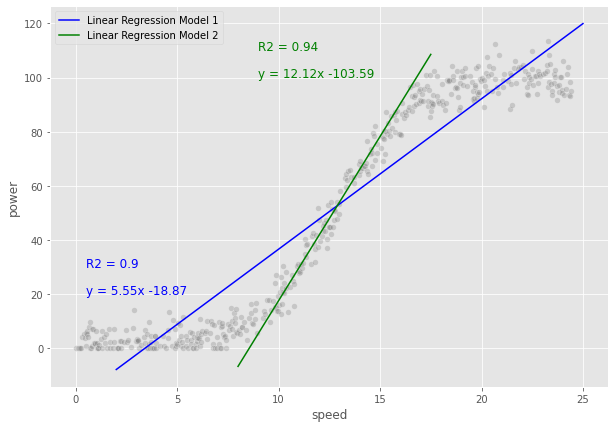

In [51]:
# Linear Regression Model 1 Plot
sns.lineplot(x=x_1, y=f1(x_1), color='b')

# Linear Regression Model 2 Plot
sns.lineplot(x=x_2, y=f2(x_2), color='g')

# provide plot legend
plt.legend(labels=['Linear Regression Model 1', 'Linear Regression Model 2'])

# include regresion line equations on plots
plt.text(0.5, 20, 'y = {}x {}'.format(round(model_1.coef_[0], 2), round(model_1.intercept_, 2)), color='blue', size=12)
plt.text(9, 100, 'y = {}x {}'.format(round(model_2.coef_[0], 2), round(model_2.intercept_, 2)), color='green', size=12)

# include r-squared values on plots
plt.text(0.5, 30, 'R2 = {}'.format(round(r_sq_1, 2), round(model_1.intercept_, 2)), color='blue', size=12)
plt.text(9, 110, 'R2 = {}'.format(round(r_sq_2, 2), round(model_2.intercept_, 2)), color='green', size=12)

# Powerproduction Dataset Plot
sns.scatterplot(data=df_clean, x="speed", y="power", color='grey', alpha=0.3)
plt.show()

By plotting the 2 linear regression lines against the *powerproduction dataset* it can be seen how well the 2 models fit.

**Linear regression model 1** was calculated using all of the values within the dataset. The model achieves a high R-Squared value = 0.9 but when reviewing against the plot it can be seen that due to the nature & shape of the wind power curve this regression line won't be suitable to be use as a means of predicting or modelling the power production of the turbine. The regression line is skewed by the datapoints that are located prior to the cut-in wind speed i.e region 1 and the datapoints that occur after the rated wind speed i.e region 3.    

**Linear regression model 2** was fitted using all the datapoints contained within the wind speed range of 10m/s upto 15m/s. The regression line fits well within this region, where there is a clear linear relationship between "wind speed" & "power". The regression line model 2 therefore makes a suitable model for predicting the power output for a given wind speed within this region. 
However the linear regression model does not take account of the the wind cut-in, the rated power or the cut-off functionalities of the turbine. It does not reflect the transitioning regions witin the powercurve where the "wind speed" & "power" follow a non-linear relationship, this is where the continous curve of the 4-parameter logistic function provides a much better fit to wind turbine powercurves.

***

## 5.0 Windpower Prediction

Continuing on from developing the linear regression models using Scikit-learn, the Scikit-learn package can be also be used to make predictions for the power output value for a given wind speed.
As noted above the linear regression model 2 is a more suitable fit for the windpower curve and therefore a simlar regression line will be used to make predictions for the power output.

As with linear regression line model 2, the data contained within the reduced range of wind speed from 10m/s upto 15m/s will be used for predictions. The data will be split into 80% used for training the model & 20% testing the model, this model will be referred to as **Linear regression model 3**.

### 5.1 Linear Regression Model 3 - LRM-3

In [29]:
# split data into 80% training data & 20% test data
x_train, x_test, y_train, y_test = train_test_split(x_sel, y_sel, test_size=0.2, random_state=0)

train_model = LinearRegression().fit(x_train, y_train)

# Output of the training model regresion line slope & intercept
print("Training Model slope: ", train_model.coef_[0])
print("Training Model intercept:", train_model.intercept_)

# Output of the training model regresion line R-Squared value
r_sq_3 = train_model.score(x_train, y_train)
print("Coefficient of Determination R^2 = ", r_sq_3)

Training Model slope:  12.32294715478089
Training Model intercept: -106.33254203214392
Coefficient of Determination R^2 =  0.9541618689315619


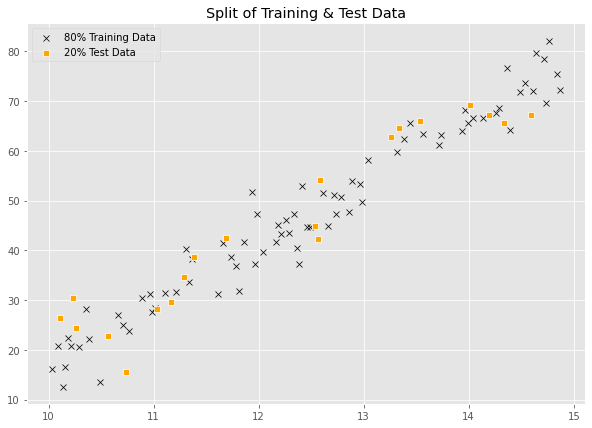

In [30]:
# plot showing the 80% training data & 20% testing data

sns.scatterplot(x=x_train.ravel(), y=y_train, color='k', marker='x')
sns.scatterplot(x=x_test.ravel(), y=y_test, color='orange', marker='s')

plt.title('Split of Training & Test Data')
plt.legend(['80% Training Data', '20% Test Data'])
plt.show()

It can be seen that the training model **LRM-3** which used 80% of the data within the wind speed range of 10m/s to 15m/s has produced a regression line which is slightly different to the **LRM-2**, some minor difference between the line slope & intercept values are noted. 

The trained model **LRM-3** is based off 80% of the data while **LRM-2** was developed using 100% of the data within the noted wind speed region. 

It can be seen that **LRM-3** results in a regression line which has a slightly higher R-Squared value when compared to that of **LRM-2**.

In [31]:
# Define function for linear regression line - model 3 (prediction model)
def f3(x):
    f3 = -106.33254203214392 + x * 12.32294715478089
    return f3

**Testing Linear Regression Model 3**

Using the remaining 20% test data with **LRM-3** to make predictions for the power output. 

In [32]:
# power prediction from test values for wind speed
y_pred = train_model.predict(x_test)

# Calculate difference between test values & predicted values
diff_test = y_test - y_pred

# Compile test & perdiction values into pandas dataframe for review 
df_compare = pd.DataFrame({'Power Actual' : y_test, 'Power Predict' : np.round(y_pred, 3), 'Difference' : diff_test}, 
                          index = np.round(x_test.ravel(), 3))

# sort dataframe by wind speed index 
df_compare = df_compare.sort_index()
df_compare

,Power Actual,Power Predict,Difference
10.110,26.427,18.252,8.174546
10.235,30.341,19.793,10.548178
10.260,24.293,20.101,4.192104
10.561,22.758,23.810,-1.052103
10.736,15.638,25.967,-10.328619
11.036,28.221,29.664,-1.442503
11.161,29.601,31.204,-1.602871
11.286,34.693,32.744,1.948760
11.386,38.636,33.977,4.659466
11.687,42.485,37.686,4.799259


In [33]:
df_compare.describe()

,Power Actual,Power Predict,Difference
count,20.000000,20.000000,20.000000
mean,44.849150,43.649550,1.199718
std,18.133451,18.570636,5.522953
min,15.638000,18.252000,-10.328619
25%,29.256000,28.739750,-2.045046
50%,42.410500,42.929500,2.413761
75%,64.816250,58.650250,5.313003
max,69.240000,73.459000,10.548178


Comparing the power values predicted from **LRM-3** against the actual power values for the test data, it can been seen that the regression model provides a good means of predicting the power output for the windturbine within the linear region of the windpower curve.

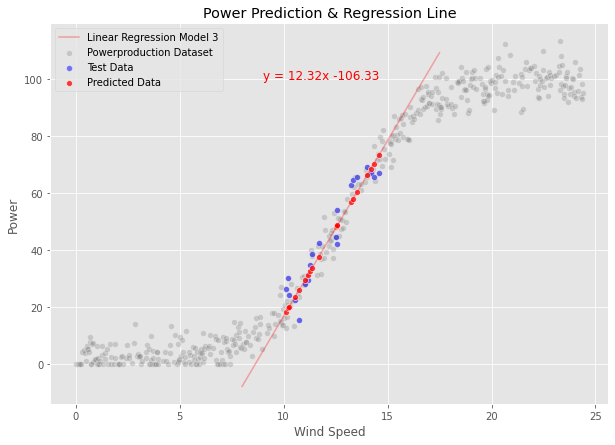

In [34]:
# plot of test & predicted data
sns.scatterplot(data=df_clean, x="speed", y="power", color='grey', alpha=0.3)
sns.scatterplot(data=df_compare, x=df_compare.index, y="Power Actual", color='b', alpha=0.5)
sns.scatterplot(data=df_compare, x=df_compare.index, y="Power Predict", color='r', alpha=0.75)

# line plot of regression line
sns.lineplot(x=x_2, y=f3(x_2), color='r', alpha=0.3)

# provide plot legend
plt.legend(['Linear Regression Model 3', 'Powerproduction Dataset', 'Test Data', 'Predicted Data'])

# include regresion line equation on plot
plt.text(9, 100, 'y = {}x {}'.format(round(train_model.coef_[0], 2), round(train_model.intercept_, 2)), color='red', size=12)

plt.ylabel("Power")
plt.xlabel("Wind Speed")
plt.title("Power Prediction & Regression Line")
plt.show()

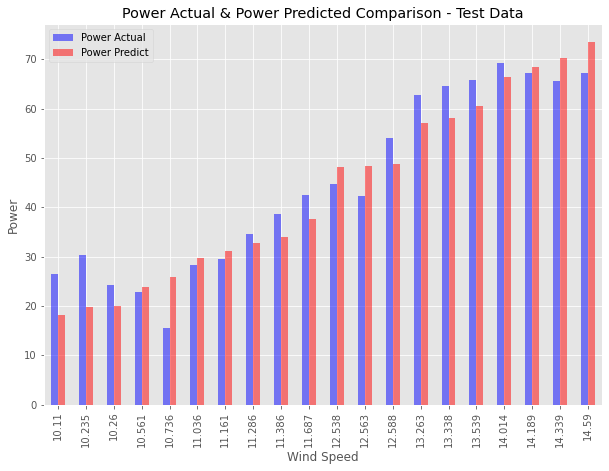

In [35]:
# Pandas dataframe bar plot
df_compare[["Power Actual", "Power Predict"]].plot.bar(color=['b', 'r'], alpha=0.5)

plt.title("Power Actual & Power Predicted Comparison - Test Data")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.show()

#### Mean Absolute Error or Difference - Test Data

For the test data, the MAE was calculated to be 4.8, i.e the average difference between the actual power data & predicted from the test data was found to be 4.8kW. 

When reviewing this value against the dataset values & against the overall rated power of the windturbine (~100kW) this seems to be a relatively low difference in power output. 
Confirming that the linear regression model provides a suitable means of predicting the power output.

In [36]:
# Max & min power difference
print("Max Power Difference =", max(diff_test))
print("Min Power Difference =", min(abs(diff_test)))

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean absolute Difference = ", MAE)

Max Power Difference = 10.548177902961516
Min Power Difference = 1.0521028694970553
Mean absolute Difference =  4.810870079937672


### 5.2 LRM-2 vs LRM-3

As shown there appears to be only very minor difference between the two linear regression model formulas developed for **LRM-2** & **LRM-3**. 

**LRM-2** was developed using 100% of the data within the wind speed region noted, while **LRM-3** was developed using 80% of the data.

Out of curiosity I decided to compare the 2 regression lines & their predictions against the original data within the wind speed region of 10m/s to 15 m/s. I imagine at this stage any results or differences between the 2 models will be akin to splitting hairs.

Linear Regression Model 2 Formula:

$ y = 12.121x - 103.59 $

Linear Regression Model 3 Formula:

$ y = 12.323x - 106.333 $

**LRM-2 Predicted Values**

Calculating the predicted power values and the corresponding mean absolute difference value using the regression line formula for LRM-2.

In [37]:
# using the wind speed from the dataset within the region of 10m/s to 15m/s

# calculate the powerout using LRM-2
y_pred_2 = model_2.coef_[0]*df_sel['speed'] + model_2.intercept_

# calculate the difference between actual power & power predicted
diff2 = df_sel['power'] - y_pred_2

print("Max Power Difference =", max(diff2))
print("Min Power Difference =", min(abs(diff2)))

# Mean absolute difference
MAE2 = metrics.mean_absolute_error(df_sel['power'], y_pred_2)
print("Mean absolute difference = ", MAE2)

Max Power Difference = 10.577603645231854
Min Power Difference = 0.03267665263186359
Mean absolute difference =  3.3648674098614975


**LRM-3 Predicted values**

Calculating the predicted power values and the corresponding mean absolute difference value using the regression line formula for LRM-3.

The difference between the two mean absolute difference values over the wind speed range of 10m/s to 15m/s is very small and practically insignificant.

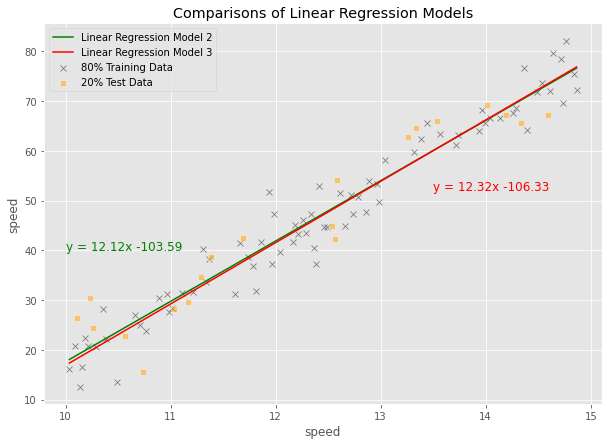

In [38]:
# using the wind speed from the dataset within the region of 10m/s to 15m/s

# calculate the powerout using LRM-3
y_pred_3 = train_model.coef_[0]*df_sel['speed'] + train_model.intercept_

# Scatterplot with Linear Regression Models 2 & 3

sns.lineplot(x=spd, y=y_pred_2, color='g')
sns.lineplot(x=spd, y=y_pred_3, color='r')

sns.scatterplot(x=x_train.ravel(), y=y_train, color='k', alpha=0.5, marker='x')
sns.scatterplot(x=x_test.ravel(), y=y_test, color='orange', alpha=0.5, marker='s')

# include regresion line equations on plots
plt.text(10, 40, 'y = {}x {}'.format(round(model_2.coef_[0], 2), round(model_2.intercept_, 2)), color='g', size=12)
plt.text(13.5, 52, 'y = {}x {}'.format(round(train_model.coef_[0], 2), round(train_model.intercept_, 2)), color='r', size=12)

plt.title("Comparisons of Linear Regression Models")
plt.legend(['Linear Regression Model 2', 'Linear Regression Model 3', '80% Training Data', '20% Test Data'])
plt.show()

The plot above indicates shows how using 100% of the data vs using 80% of the data has influenced the regression line formulas produced.

#### Mean Absolute Error or Difference

In [39]:
# calculate the difference between actual power & power predicted
diff3 = df_sel['power'] - y_pred_3

print("Max Power Difference =", max(diff3))
print("Min Power Difference =", min(abs(diff3)))

# Mean absolute difference
MAE3 = metrics.mean_absolute_error(df_sel['power'], y_pred_3)
print("Mean absolute difference = ", MAE3)

Max Power Difference = 10.914521845524426
Min Power Difference = 0.11931307382501188
Mean absolute difference =  3.3833496813957584


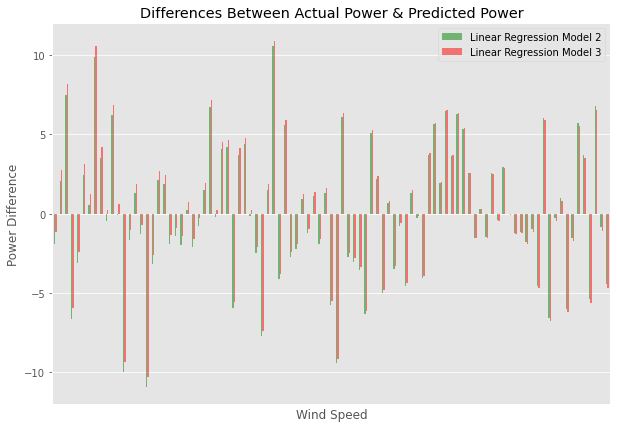

In [40]:
# Plot the difference between actual power output & predicted values for both LRM-2 & LRM-3.

# compile differences as pandas dataframe
df_diff = pd.DataFrame({'Wind Speed' : spd, 'Linear Regression Model 2' : diff2, 'Linear Regression Model 3' : diff3})
df_diff = df_diff.set_index('Wind Speed')

# bar plot of differences
df_diff.plot.bar(color=['g', 'r'], alpha=0.5)

plt.title("Differences Between Actual Power & Predicted Power")
plt.xlabel("Wind Speed")
plt.ylabel("Power Difference")
plt.xticks([])
plt.show()

The difference between the predicted power calculated from the regression models & the actual dataset power output can be seen to vary from as large as +/- 10kW down to +/- 0.03kW for within the given wind speed range. 

The mean absolute difference over the full data within the given wind speed range was calculated to be approx 3.4kW for both linear regression models.

The plot above shows that the difference in predicting power using either of the linear regression models is minimal & both models would be suitable for estimating the power output for a given wind speed within the 10m/s to 15m/s range. 

***

## 6.0 Polynomial Regression

As an additional exercise to model a 'best fit' line to the wind power curve and to possibly improve on the previous linear regression models, a polynomial regression line can be used to replicate the nonlinear regions & relationships between the wind speed & corresponding power values.

A polynomial regression line has an equation of the form, 

$$ a_{n}x^{n}+a_{n-1}x^{n-1}+\dotsb +a_{2}x^{2}+a_{1}x+a_{0} \hspace{1cm} (5) $$

NumPy's polyfit function can be used to developed a polynomial model using the method of least squares.

The NumPy polyfit function solves for the 'best fit' coefficients of the polynomial regression model for the inputted data, i.e $ a_{0}, a_{1}....a_{n} $. 

The number of degrees $ n $ for the polynomial function will be determined by reviewing & overlaying the regression plot against the *powerproduction dataset*.  

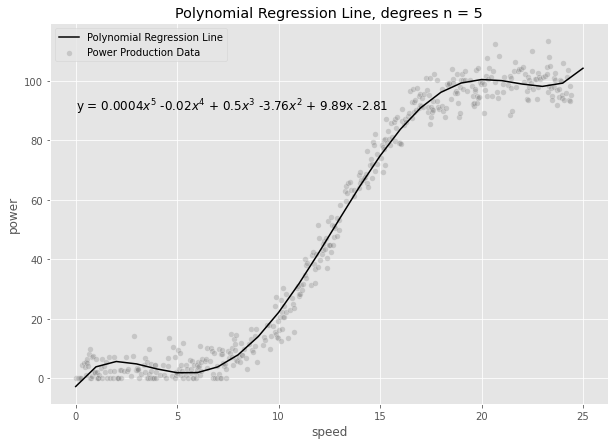

Polynomial Regression Line Function 
            5           4         3         2
0.0003745 x - 0.02379 x + 0.502 x - 3.756 x + 9.895 x - 2.812


In [41]:
# set the x & y variables, wind speed & power.
x = df_clean['speed']
y = df_clean['power']

# NumPy's polyfit function with input x & y arrays and the degree of the fitting polynomial, degrees n = 5.
# p,  polynomial coefficients
p = np.polyfit(x, y, 5)

# f, polynomial function in the form of formula 5
f = np.poly1d(p)

# Provide x & y values to plot the polynomial regression line
x_poly = np.linspace(0, 25, 26)
# calculate y values
y_poly = f(x_poly)

# plot of polynomial regression line
sns.scatterplot(data=df_clean, x="speed", y="power", color='grey', alpha=0.3)
sns.lineplot(x_poly, y_poly, color="k")

plt.text(0, 90, 'y = {}$x^5$ {}$x^4$ + {}$x^3$ {}$x^2$ + {}x {}'.format(round(p[0], 4), round(p[1], 2), round(p[2], 2), round(p[3], 2), round(p[4], 2), round(p[5], 2))
         ,color='k', size=12)

plt.legend(["Polynomial Regression Line", "Power Production Data"])
plt.title("Polynomial Regression Line, degrees n = 5")
plt.show()

print("Polynomial Regression Line Function", "\n", f)

It can be seen from the plot, that the 5 degree polynomial function provides a good fit to the powercurve for wind speeds in the region of 5m/s up to 20m/s. It however doesn't provide a good representation of the turbine behaviour outside these regions i.e at & prior to the *$ v_{cut-in} $* wind speed or after the *$ v_{rated} $* wind speed.

Therefore the function will just be reviewed against the data within the wind speeds of this range, 5m/s to 20m/s.

In [42]:
# Define function for polynomial regression model 
def f4(x):
    f4 = 0.0003745*x**5 - 0.02379*x**4 + 0.502*x**3 - 3.756*x**2 + 9.895*x - 2.812 
    return f4

In [43]:
# Selecting the data within the range of wind speed from 5m/s up to 20m/s
spd_5_20 = df_clean["speed"][(df_clean["speed"]>5) & (df_clean["speed"]<20)]
pwr_5_20 = df_clean["power"][(df_clean["speed"]>5) & (df_clean["speed"]<20)]

# Calculate the power from the polynomial regression
poly_pred = f4(spd_5_20)

# Calculate the power difference
diff4 = pwr_5_20 - poly_pred

# compile Actual Power & Predicted Power into a pandas dataframe
df_poly = pd.DataFrame({'Wind Speed' : spd_5_20, 'Power Actual' : pwr_5_20, 'Power Predict' : np.round(poly_pred, 3), "Difference" : diff4})
df_poly= df_poly.set_index('Wind Speed')

df_poly

,Power Actual,Power Predict,Difference
Wind Speed,,,
5.030,9.519,1.793,7.726019
5.080,2.973,1.760,1.213241
5.130,8.623,1.730,6.892953
5.180,4.525,1.704,2.821072
5.205,0.932,1.692,-0.760243
...,...,...,...
19.820,94.071,100.595,-6.523937
19.845,104.188,100.611,3.577025
19.895,94.489,100.640,-6.151003


#### Mean Absolute Error or Difference

In [44]:
print("Max Power Difference =", max(diff4))
print("Min Power Difference =", min(abs(diff4)), "\n")

# Mean Absolute Difference over total range of data within 5 to 20m/s
MAE4 = metrics.mean_absolute_error(pwr_5_20 , poly_pred)
print("Mean absolute difference = ", MAE4, "(full wind speed region 5 to 20m/s)")


# Mean Absolute Difference over range of data within 5 to 10m/s
MAE5 = metrics.mean_absolute_error(df_poly["Power Actual"][(df_poly.index>5) & (df_poly.index<10)], 
                                   df_poly["Power Predict"][(df_poly.index>5) & (df_poly.index<10)]
                                  )
print("Mean absolute difference = ", MAE5, "(wind speed region 5 to 10m/s)")


# Mean Absolute Difference over range of data within 10 to 15m/s
MAE6 = metrics.mean_absolute_error(df_poly["Power Actual"][(df_poly.index>10) & (df_poly.index<15)], 
                                   df_poly["Power Predict"][(df_poly.index>10) & (df_poly.index<15)]
                                  )
print("Mean absolute difference = ", MAE6, "(wind speed region 10 to 15m/s)")

# Mean Absolute Difference over range of data within 15 to 20m/s
MAE7 = metrics.mean_absolute_error(df_poly["Power Actual"][(df_poly.index>15) & (df_poly.index<20)], 
                                   df_poly["Power Predict"][(df_poly.index>15) & (df_poly.index<20)]
                                  )
print("Mean absolute difference = ", MAE7, "(wind speed region 15 to 20m/s)")

Max Power Difference = 10.009102334187157
Min Power Difference = 0.0012748288995183543 

Mean absolute difference =  3.6083496163667386 (full wind speed region 5 to 20m/s)
Mean absolute difference =  3.292801980198019 (wind speed region 5 to 10m/s)
Mean absolute difference =  3.7146391752577324 (wind speed region 10 to 15m/s)
Mean absolute difference =  3.8061651376146797 (wind speed region 15 to 20m/s)


#### R-Squared (coefficient of determination) Values 

In [45]:
# R-Squared values over range of data within 5 to 20m/s
r_sq_4 = metrics.r2_score(df_poly["Power Actual"][(df_poly.index>5) & (df_poly.index<20)], 
                                   df_poly["Power Predict"][(df_poly.index>5) & (df_poly.index<20)]
                         )

print("Coefficient of Determination R^2 = ", r_sq_4, "(full wind speed region 5 to 20m/s)")

# R-Squared values over range of data within 5 to 10m/s
r_sq_5 = metrics.r2_score(df_poly["Power Actual"][(df_poly.index>5) & (df_poly.index<10)], 
                                   df_poly["Power Predict"][(df_poly.index>5) & (df_poly.index<10)]
                         )

print("Coefficient of Determination R^2 = ", r_sq_5, "(wind speed region 5 to 10m/s)")

# R-Squared values over range of data within 10 to 15m/s
r_sq_6 = metrics.r2_score(df_poly["Power Actual"][(df_poly.index>10) & (df_poly.index<15)], 
                                   df_poly["Power Predict"][(df_poly.index>10) & (df_poly.index<15)]
                         )

print("Coefficient of Determination R^2 = ", r_sq_6, "(wind speed region 10 to 15m/s)")

# R-Squared values over range of data within 15 to 20m/s
r_sq_7 = metrics.r2_score(df_poly["Power Actual"][(df_poly.index>15) & (df_poly.index<20)], 
                                   df_poly["Power Predict"][(df_poly.index>15) & (df_poly.index<20)]
                         )

print("Coefficient of Determination R^2 = ", r_sq_7, "(wind speed region 15 to 20m/s)")

Coefficient of Determination R^2 =  0.9850418835349117 (full wind speed region 5 to 20m/s)
Coefficient of Determination R^2 =  0.47624062525857036 (wind speed region 5 to 10m/s)
Coefficient of Determination R^2 =  0.932792654323477 (wind speed region 10 to 15m/s)
Coefficient of Determination R^2 =  0.6201236007301487 (wind speed region 15 to 20m/s)


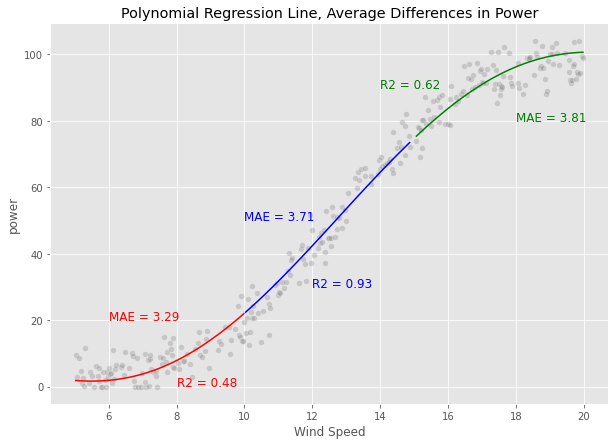

In [46]:
# plot of polynomial regression line, highlighting different sections of powercurve
sns.scatterplot(x=spd_5_20, y=pwr_5_20, color='grey', alpha=0.3)

df_poly["Power Predict"][(df_poly.index>5) & (df_poly.index<10)].plot(color='r')
df_poly["Power Predict"][(df_poly.index>10) & (df_poly.index<15)].plot(color='b')
df_poly["Power Predict"][(df_poly.index>15) & (df_poly.index<20)].plot(color='g')

# include mean absolute error value / difference in power
plt.text(6, 20, 'MAE = {}'.format(round(MAE5, 2)), color='r', size=12)
plt.text(10, 50, 'MAE = {}'.format(round(MAE6, 2)), color='b', size=12)
plt.text(18, 80, 'MAE = {}'.format(round(MAE7, 2)), color='g', size=12)

# include R-Squared values
plt.text(8, 0, 'R2 = {}'.format(round(r_sq_5, 2)), color='r', size=12)
plt.text(12, 30, 'R2 = {}'.format(round(r_sq_6, 2)), color='b', size=12)
plt.text(14, 90, 'R2 = {}'.format(round(r_sq_7, 2)), color='g', size=12)

plt.title("Polynomial Regression Line, Average Differences in Power")
plt.show()

From reviewing the mean absolute error or difference values or the mean variance in power output from the polynomial regression line against the powerproduction dataset values, it can be seen that these values are similar to that produced by the linear regression models.

The polynomial regression line is not as accurate for within the wind speed region of 10 to 15m/s, as a slightly larger MAE value with a lower R-Squared value was calculated here when compared to the linear regression models.

The polynomial regression line does appear to provide a relatively good representation of the data within the non-linear regions, i.e wind speeds from 5 to 10m/s & 15 to 20m/s. The mean absolute differences calculated are relatively low i.e 3.29 & 3.81. However the R-Square values calculated for these regions are also low i.e 0.48 & 0.62, which would indicate the polynomial regression lines for these regions doesn't necessarily provide the 'best fit' for the datapoints collected within these windspeeds zones. 

From reviewing the plot above it can be seen that there is quite a bit of variability between the datapoints within these two non-linear regions around the *$ v_{cut-in} $* & *$ v_{rated} $* windspeeds, which makes it quite difficult to achieve an precise regression model at these locations of the powercurve to reflect the collected datapoints.     

Ideally to produce a more accurate model & to correctly replicate the operational behaviour of the wind turbine within these non-linear regions, further specific turbine information would be required, such as the *$ v_{cut-in} $*,  *$ v_{rated} $* and *$ v_{cut-off} $* wind speeds of the turbine. 

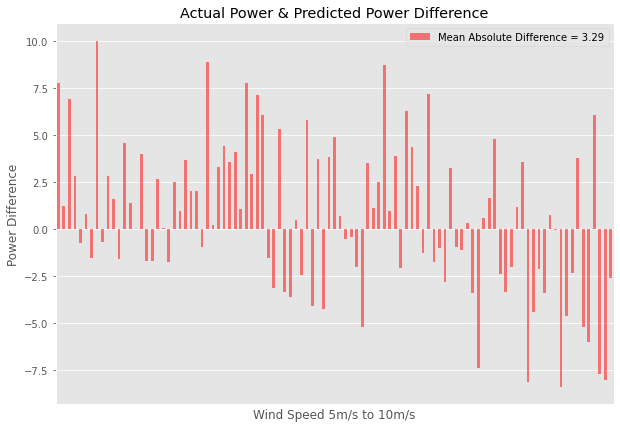

In [47]:
# bar plot of differences for non-linear regions of powercurve (5 to 10m/s)
df_poly["Difference"][(df_poly.index>5) & (df_poly.index<10)].plot.bar(color="r", alpha=0.5)

plt.title("Actual Power & Predicted Power Difference")
plt.legend(["Mean Absolute Difference = 3.29"])
plt.xlabel("Wind Speed 5m/s to 10m/s")
plt.ylabel("Power Difference")
plt.xticks([])
plt.show()

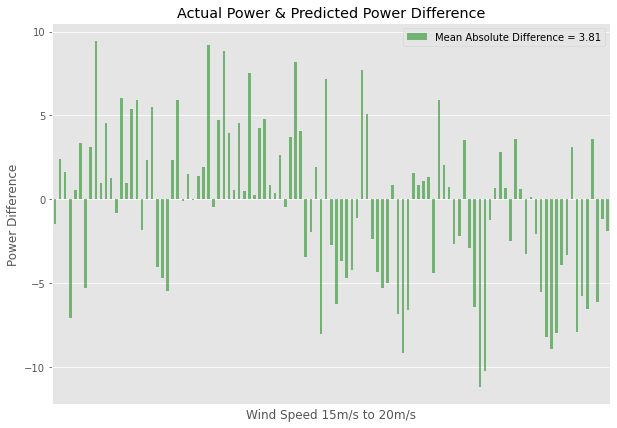

In [48]:
# bar plot of differences for non-linear regions of powercurve (15 to 20m/s)
df_poly["Difference"][(df_poly.index>15) & (df_poly.index<20)].plot.bar(color="g", alpha=0.5)

plt.title("Actual Power & Predicted Power Difference")
plt.legend(["Mean Absolute Difference = 3.81"])
plt.xlabel("Wind Speed 15m/s to 20m/s")
plt.ylabel("Power Difference")
plt.xticks([])
plt.show()

Similar to the linear regression models, the difference between the predicted power calculated from the polynomial regression model & the actual dataset power output is seen to vary from as large as +/- 10kW down to +/- 0.001kW for within the given wind speed ranges. 

The average absolute power difference of 3.6kW across the wind speed range of 5 to 20m/s seems like a reasonable power prediction variance for a wind turbine that has a power rating of approximately 100kW.

***

## 7.0 Conclusion

As part of the project, a number of different ways of modelling the wind turbine power curve was investigated, the models were developed & based off the information provided within the *powerproduction dataset*.

1. Theoretical Wind Power Formula
2. 4-Parameter Logistic Function Model
3. Linear Regression
4. Polynomial Regression

Each model can be used to predict or estimate the power output of the wind turbine, however each model has different limitations and capabilities.

- The Theoretical Wind Power Formula might be useful for very simple & quick power output estimates where some basic turbine & site properties are known. The theoretical formula however does not account for any of the practical workings of a wind turbine i.e cut-in & cut-off wind speeds, turbine rated power etc. The theoretical formula would most likely over estimate power output values and therefore would not be suitable for any indepth analysis or calculations. 


- The 4-Parameter Logistic Function Model provides a very good continuous model of the wind turbine power curve. However to correctly fit the model to the dataset some turbine properties and values would need to be confirmed by the turbine manufacturer, i.e turbine rated power etc. Also the 4-Parameter Logistic Function Model would also need to be slightly adjusted in order to replicate the turbine behaviour around the *$ v_{cut-in} $*,  *$ v_{rated} $* and *$ v_{cut-off} $* regions.


- The Linear Regression model, provides a good means of predicting the power output for within the wind speed region of 10 to 15m/s, where there is a clear linear relationship between wind speed & power output. The mean absolute difference between the dataset's actual power output and the predicted values was found to be 3.4kW over this range of wind speed. A max power difference of approx. 10kW down to a min power difference of 0.03kW was noted, which seems like quite a reasonable range of power difference for a wind turbine which has a rated power output of around the 100kW mark.


- The Polynomial Regression model improved slightly on the linear regression model, as it provides a means to model the non-linear regions of the power curve, i.e wind speed regions of 5 to 10m/s & 15 to 20m/s. Again the mean absolute difference between the dataset's actual power output and the predicted values was found to be quite low, around 3.3 to 3.8kW power range. But similarly to the 4-Parameter Logistic Function Model, further turbine properties would be required to slightly adjust the model in order to correctly replicate the turbine behaviour around the *$ v_{cut-in} $*,  *$ v_{rated} $* and *$ v_{cut-off} $* regions. 
***

## References

[1] [seai.ie, Sustainable Energy Authority of Ireland](https://www.seai.ie/technologies/wind-energy/#:~:text=Wind%20energy%20in%20Ireland,of%20renewable%20energy%20in%20Ireland.&text=In%202018%20Wind%20provided%2085,in%20Ireland%20after%20natural%20gas.)

[2] [raeng.org.uk, The Royal Academy of Engineering - Wind Turbine Power Calculations Publication](https://www.raeng.org.uk/publications/other/23-wind-turbine)

[3] [shanelynn.ie, Pandas Dataframe Indexing](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

[4] [Reformulation of parameters of the logistic function applied to power curves of wind turbines, Daniel Villanueva & Andrés E.Feijóo, sciencedirect.com](https://www.sciencedirect.com/science/article/pii/S0378779616300992)

[5] [towardsdatascience.com, Linear Regression Examples](https://towardsdatascience.com/statistical-overview-of-linear-regression-examples-in-python-80a38680e053)

[6] [realpython.com, Linear Regression](https://realpython.com/linear-regression-in-python/)

[7] [stat.yale.edu, Linear Regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)

[8] [technologynetworks.com, Calculating Least Squares Regression](https://www.technologynetworks.com/informatics/articles/calculating-a-least-squares-regression-line-equation-example-explanation-310265)

[9] [kdnuggets.com, Beginners Guide Linear Regression - Scikit-Learn](https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html)

[10] [dataquest.io, Understanding Regression Error Metrics](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

[11] [towardsdatascience.com, Polynomial Regression](https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2)

[12] [geeksforgeeks.org, r2-score](https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/)